In [1]:
# RF to predict tti or log tti or ahd from all other data
# use households until find pop
# dimensionality reduction?

# factorsd impacting congestion, networks, tti, modeshares

# tti website has other papers

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error
from sklearn.inspection import permutation_importance

In [3]:
#cfc = pd.read_csv('../../data/tidy/msa-carbon-footprint.csv')
trf = pd.read_csv('../../data/tidy/tti-renamed.csv')
net = pd.read_csv('../../data/tidy/data-aggregation-networkstats.csv')
inc = pd.read_csv('../../data/tidy/data-aggregation-income.csv')
mod = pd.read_csv('../../data/tidy/data-aggregation-ms.csv')
unemp = pd.read_csv('../../data/tidy/acs-unemp.csv')
#cfc = pd.read_csv('../../data/tidy/combined-dataset.csv')

In [4]:
#ahd_list = df['ahd'].tolist()
 
# show the list
#print(ahd_list)

In [5]:
#cfc = cfc.dropna(subset=['tti'])


In [6]:
trf

,msa,auto_commuters,annual_excess_fuel_consumed_commuters,ahd,tti
0,"Abilene, TX",62,788,1694,1.06
1,"Akron, OH",298,6453,14470,1.11
2,"Albany, GA",53,810,1752,1.07
3,"Albany-Schenectady-Troy, NY",300,5172,13605,1.14
4,"Albuquerque, NM",380,8950,18864,1.15
...,...,...,...,...,...
337,"Yakima, WA",76,1180,2522,1.09
338,"York-Hanover, PA",49,227,594,1.12
339,"Youngstown-Warren-Boardman, OH-PA",217,3121,7185,1.05
340,"Yuba City, CA",66,1081,2490,1.16


In [7]:
net

,msa,n,m,k_avg,edge_length_total,edge_length_avg,streets_per_node_avg,intersection_count,street_length_total,street_segment_count,street_length_avg,circuity_avg,self_loop_proportion,node_density_km,intersection_density_km,edge_density_km,street_density_km,builing_area_sqkm,area_sqkm
0,"Abilene, TX",14357,39401,5.488751,1.716897e+07,435.749497,2.881452,11912,8.925436e+06,20606,433.147439,1.067840,0.004465,2.012523,1.669790,2406.696840,1251.142264,7.048505,7133.829924
1,"Albany, GA",8466,22838,5.395228,9.545102e+06,417.948256,2.837468,6957,4.989593e+06,11954,417.399446,1.052833,0.002928,2.028965,1.667318,2287.583389,1195.808038,6.979580,4172.570196
2,"Akron, OH",26865,70900,5.278243,1.519199e+07,214.273426,2.756896,21200,8.039295e+06,36980,217.395754,1.056240,0.015089,11.231303,8.862967,6351.230011,3360.943838,14.307097,2391.975398
3,"Albany-Lebanon, OR",7132,17906,5.021312,8.280294e+06,462.431276,2.568144,5101,4.225439e+06,9147,461.948061,1.150205,0.005466,1.193324,0.853498,1385.456359,706.999160,7.519705,5976.582645
4,"Albany-Schenectady-Troy, NY",36977,96867,5.239311,2.787244e+07,287.739291,2.755794,30254,1.455542e+07,50900,285.961192,1.091565,0.033320,4.962653,4.060365,3740.737967,1953.471821,41.455466,7451.054339
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
367,"Worcester, MA-CT",38037,95787,5.036517,2.460403e+07,256.861904,2.657938,29828,1.289468e+07,50471,255.486983,1.077187,0.017416,6.986970,5.479069,4519.484519,2368.608706,74.415961,5443.990594
368,"York-Hanover, PA",16622,44476,5.351462,1.329126e+07,298.841079,2.781194,13507,6.831205e+06,23064,296.184733,1.080534,0.006287,7.049714,5.728582,5637.080320,2897.246871,18.432839,2357.826232
369,"Yuba City, CA",8419,21665,5.146692,7.925868e+06,365.837452,2.678465,6360,4.094273e+06,11260,363.612188,1.084151,0.002220,2.597365,1.962138,2445.227397,1263.133400,1.594076,3241.362503
370,"Youngstown-Warren-Boardman, OH-PA",24885,66650,5.356641,1.973854e+07,296.152150,2.794736,19982,1.038162e+07,34674,299.406523,1.044778,0.006085,5.511548,4.425628,4371.706396,2299.329155,15.897550,4515.065516


In [8]:
df = trf.merge(net, left_on='msa', right_on='msa', how='left')

In [9]:
df.head()

,msa,auto_commuters,annual_excess_fuel_consumed_commuters,ahd,tti,n,m,k_avg,edge_length_total,edge_length_avg,...,street_segment_count,street_length_avg,circuity_avg,self_loop_proportion,node_density_km,intersection_density_km,edge_density_km,street_density_km,builing_area_sqkm,area_sqkm
0,"Abilene, TX",62,788,1694,1.06,14357,39401,5.488751,1.716897e+07,435.749497,...,20606,433.147439,1.067840,0.004465,2.012523,1.669790,2406.696840,1251.142264,7.048505,7133.829924
1,"Akron, OH",298,6453,14470,1.11,26865,70900,5.278243,1.519199e+07,214.273426,...,36980,217.395754,1.056240,0.015089,11.231303,8.862967,6351.230011,3360.943838,14.307097,2391.975398
2,"Albany, GA",53,810,1752,1.07,8466,22838,5.395228,9.545102e+06,417.948256,...,11954,417.399446,1.052833,0.002928,2.028965,1.667318,2287.583389,1195.808038,6.979580,4172.570196
3,"Albany-Schenectady-Troy, NY",300,5172,13605,1.14,36977,96867,5.239311,2.787244e+07,287.739291,...,50900,285.961192,1.091565,0.033320,4.962653,4.060365,3740.737967,1953.471821,41.455466,7451.054339
4,"Albuquerque, NM",380,8950,18864,1.15,56267,139711,4.966001,4.185019e+07,299.548265,...,76552,290.921216,1.089403,0.003762,2.336804,1.791798,1738.064896,924.912213,75.879548,24078.610478


In [10]:
df = df.merge(mod, left_on='msa', right_on='msa', how='inner')

In [11]:
df = df.merge(unemp, left_on = 'msa', right_on = 'msa', how = 'left')

In [12]:
df = df.merge(inc, left_on = 'msa', right_on = 'msa', how = 'left')

In [13]:
df = df.dropna(subset=['tti'])
df['log_tti'] = np.log10(df['tti'])

In [14]:
df.head()

,msa,auto_commuters,annual_excess_fuel_consumed_commuters,ahd,tti,n,m,k_avg,edge_length_total,edge_length_avg,...,ms_carp,ms_pt,ms_taxi,ms_bike,ms_walk,ms_wfh,unemp,households,med_hh_inc_dol,log_tti
0,"Abilene, TX",62,788,1694,1.06,14357,39401,5.488751,1.716897e+07,435.749497,...,0.117276,0.006420,0.017641,0.002089,0.024034,0.026081,6.4,60343,44249,0.025306
1,"Akron, OH",298,6453,14470,1.11,26865,70900,5.278243,1.519199e+07,214.273426,...,0.066992,0.014979,0.005027,0.001327,0.016849,0.032080,9.7,281752,50776,0.045323
2,"Albany, GA",53,810,1752,1.07,8466,22838,5.395228,9.545102e+06,417.948256,...,0.123413,0.010765,0.007939,0.001490,0.019618,0.032567,15.0,58250,36805,0.029384
3,"Albany-Schenectady-Troy, NY",300,5172,13605,1.14,36977,96867,5.239311,2.787244e+07,287.739291,...,0.076936,0.032160,0.009713,0.002339,0.036837,0.037290,7.4,347401,61841,0.056905
4,"Albuquerque, NM",380,8950,18864,1.15,56267,139711,4.966001,4.185019e+07,299.548265,...,0.095175,0.018131,0.013973,0.009816,0.018735,0.044445,9.1,344168,48875,0.060698


In [15]:
len(df.columns)

34

In [16]:
len(df)

307

In [17]:
df = df.set_index('msa')

In [18]:
from pathlib import Path  
filepath = Path('../../data/tidy/congestion-exploration.csv', index = False)  
filepath.parent.mkdir(parents=True, exist_ok=True)  
df.to_csv(filepath)

In [40]:
rf = RandomForestRegressor(max_features= 1.0, n_estimators=2000, random_state=0, max_depth = None) #ccp_alpha=0.1
X = df.drop(columns=['tti','log_tti'])
Y = (df['log_tti'])
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = .2, random_state = 1)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
#y_pred


In [29]:
y_pred_train = rf.predict(X_train)
#y_pred_train

In [21]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
param_grid = { 
    'n_estimators': [100, 200, 300, 400, 500, 600, 700],
    'max_features': [1.0, 'sqrt', 'log2'],
    'max_depth' : [2, 3, 4,5,6,7,8, 9, 10, 11, 12],   
}
CV_rf = GridSearchCV(estimator=rf, param_grid=param_grid, cv= 5)
CV_rf.fit(X_train, y_train)
CV_rf.best_params_

{'max_depth': 6, 'max_features': 1.0, 'n_estimators': 100}

In [41]:
mse = mean_squared_error(y_test, y_pred)
mape = mean_absolute_percentage_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f'mse = {mse} mape = {mape} rmse = {rmse}')

mse = 0.00012202753705031499 mape = 0.2344981265742716 rmse = 0.011046607490551794


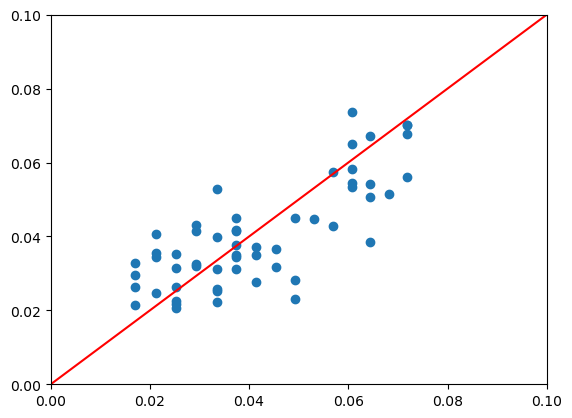

In [42]:
plt.scatter(y_test, y_pred)
plt.ylim(0, .1)
plt.xlim(0, .1)
x = np.linspace(0,2,20)
y = np.linspace(0,2,20)
plt.plot(x, y, color = 'red')
plt.savefig('../../figures/tti-pred')

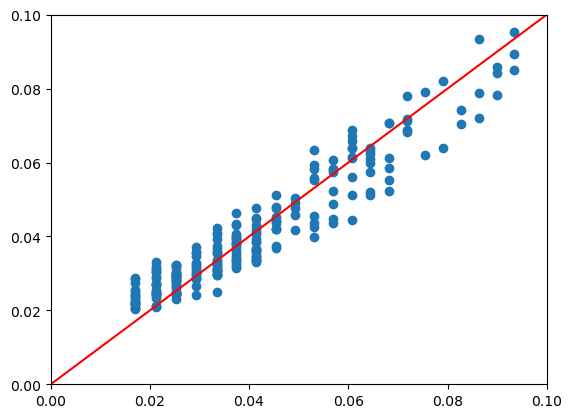

In [24]:
plt.scatter(y_train, y_pred_train)
plt.ylim(0, .1)
plt.xlim(0, .1)
x = np.linspace(0,2,20)
y = np.linspace(0,2,20)
plt.plot(x, y, color = 'red')

In [43]:
result = permutation_importance(
    rf, X_test, y_test, n_repeats=10, random_state=42, n_jobs=2)
tree_importances = pd.Series(result.importances_mean, index=X.columns)

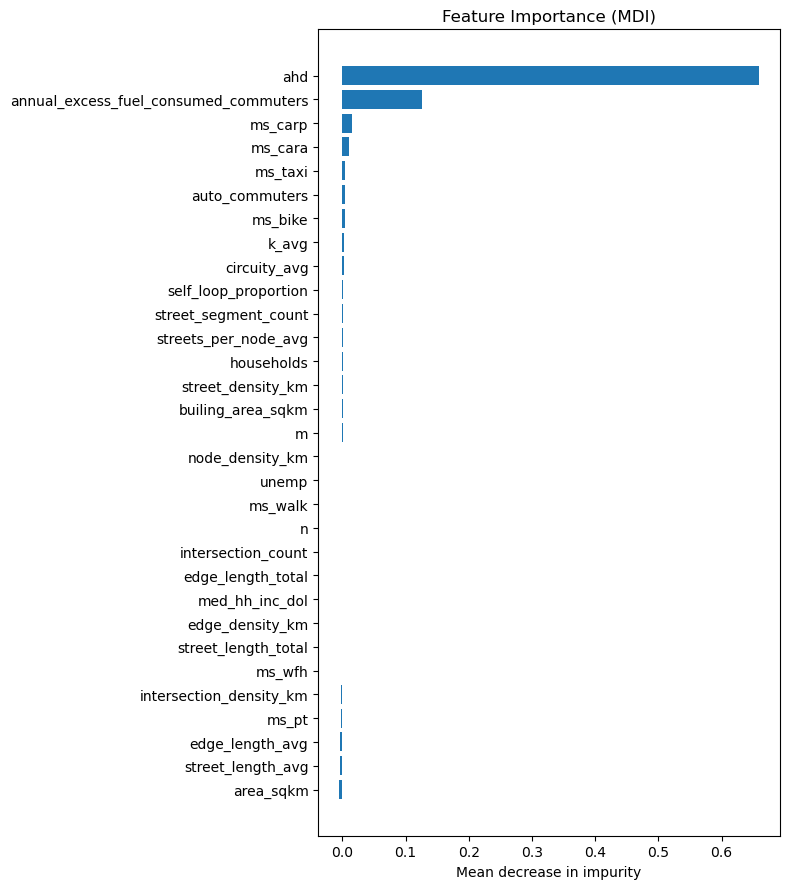

In [44]:
# sort features according to importance
sorted_idx = np.argsort(tree_importances)
pos = np.arange(sorted_idx.shape[0])

plt.figure(figsize=(8,9))
# plot feature importances
plt.barh(pos, tree_importances[sorted_idx], align="center")

plt.yticks(pos, np.array(X.columns)[sorted_idx])
plt.title("Feature Importance (MDI)")
plt.xlabel("Mean decrease in impurity");
plt.tight_layout()
plt.savefig('../../figures/log-tti-rf.png',dpi=300)

In [27]:
rfc = RandomForestRegressor(max_features= 'log2', n_estimators=500, random_state=0, max_depth = 8 ) #ccp_alpha=0.1
X = df.drop(columns=['ahd', 'log_tti'])
Y = (df['ahd'])
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = .2, random_state = 1)
rfc.fit(X_train, y_train)
y_pred = rfc.predict(X_test)
y_pred

NameError: name 'log2' is not defined

In [ ]:
mse = mean_squared_error(y_test, y_pred)
mape = mean_absolute_percentage_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f'mse = {mse} mape = {mape} rmse = {rmse}')

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
param_grid = { 
    'n_estimators': [100, 200,300, 400, 500, 600, 700],
    'max_features': [1.0, 'sqrt', 'log2'],
    'max_depth' : [2, 3, 4,5,6,7,8, 9, 10, 11],   
}
CV_rfc = GridSearchCV(estimator=rfc, param_grid=param_grid, cv= 5)
CV_rfc.fit(X_train, y_train)
CV_rfc.best_params_

In [ ]:
plt.scatter(y_test, y_pred)
plt.ylim(0,40000)
plt.xlim(0, 40000)
x = np.linspace(0,40000,20)
y = np.linspace(0,40000,20)
plt.plot(x, y, color = 'red')
plt.savefig('../../figures/ahd_pred')

In [ ]:
result = permutation_importance(
    rfc, X_test, y_test, n_repeats=10, random_state=42, n_jobs=2)
tree_importances = pd.Series(result.importances_mean, index=X.columns)

In [ ]:
# sort features according to importance
sorted_idx = np.argsort(tree_importances)
pos = np.arange(sorted_idx.shape[0])

plt.figure(figsize=(8,9))
# plot feature importances
plt.barh(pos, tree_importances[sorted_idx], align="center")

plt.yticks(pos, np.array(X.columns)[sorted_idx])
plt.title("Feature Importance (MDI)")
plt.xlabel("Mean decrease in impurity");
plt.tight_layout()
plt.savefig('../../figures/ahd-rf.png',dpi=300)